In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno
import warnings
warnings.simplefilter("ignore")
from google.colab import drive
import plotly.express as px
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.io import output_notebook

In [ ]:
df1 = pd.read_csv('/content/IMDB-Movie-Data.csv')
df2 = pd.read_csv('/content/imdb_clean.csv')

In [ ]:
df1.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [ ]:
feature_info_list = []

for column in df1.columns:
    dtype = df1[column].dtype
    scale = 'Непрерывная' if dtype in ['int64', 'float64'] else 'Категориальная'
    feature_info_list.append({'Признак': column, 'Тип данных': dtype, 'Шкала': scale})

feature_info = pd.DataFrame(feature_info_list)

feature_info

,Признак,Тип данных,Шкала
0,Rank,int64,Непрерывная
1,Title,object,Категориальная
2,Genre,object,Категориальная
3,Description,object,Категориальная
4,Director,object,Категориальная
5,Actors,object,Категориальная
6,Year,int64,Непрерывная
7,Runtime (Minutes),int64,Непрерывная
8,Rating,float64,Непрерывная
9,Votes,int64,Непрерывная


In [ ]:
df2.head()

,Unnamed: 0,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
2,1,The Godfather,Francis Ford Coppola,1972,175,Drama,9.2,100,134.97
3,2,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
4,2,The Dark Knight,Christopher Nolan,2008,152,Crime,9.0,84,534.86


In [ ]:
feature_info_list = []

for column in df2.columns:
    dtype = df2[column].dtype
    scale = 'Непрерывная' if dtype in ['int64', 'float64'] else 'Категориальная'
    feature_info_list.append({'Признак': column, 'Тип данных': dtype, 'Шкала': scale})

feature_info = pd.DataFrame(feature_info_list)

feature_info

,Признак,Тип данных,Шкала
0,Unnamed: 0,int64,Непрерывная
1,title,object,Категориальная
2,director,object,Категориальная
3,release_year,int64,Непрерывная
4,runtime,int64,Непрерывная
5,genre,object,Категориальная
6,rating,float64,Непрерывная
7,metascore,int64,Непрерывная
8,gross(M),float64,Непрерывная


Датафрейм 1:

Датасет подойдет для анализа оценок и доходов фильмов по жанрам, продюсерам, году выпуска, длительности; сравнение рейтингов фильмов среди зрителей и критиков; отслеживание тенденций роста доходов фильмов в 00-х - 10-х годах; анализ количества зрительских оценок в зависимости от жанра.

Не подойдет: Анализ заработка фильмов в зависимости от страны, возрастных ограничений; отслеживание тенденций в популярных жанрах и заработке за длительный период времени.

Датафрейм 2:

Датасет подойдет для анализа оценок и доходов фильмов по жанрам, продюсерам, году выпуска, длительности; сравнение рейтингов фильмов среди зрителей и критиков; анализ количества зрительских оценок в зависимости от жанра.

Не подойдет: для отслеживания тенденция роста доходов фильма 00-х - 10-х годах. Датасет имеет слишком большой разброс фильмов по году выпуска (1920 - 2023),  поэтому будет сложно выдвинуть и проверить качественные гипотезы, связанные с тенденциями современности в жанрах фильмов. Помимо этого, датасет имеет повторяющиеся значения, тем самым при их обработке данная выборка станет намного меньше и последующий анализ будет менее эффективным. Также не подойдет для анализа актеров, которые снимались в самых популярных фильмах (т.к. в датафрейме они не указаны)

**Вывод:** Отметим, что в датасете 2 содержится такие же критерии сравнения, как и в датасете 1. Но наиболее интересным для анализа нам показался датасет 1, так как мы сможем проанализировать гипотезы, связанные с главными актерами, а также с доходами фильма и оценками критиков с большим количеством элементов в выборке. К тому же, новые тенденции в популярности фильмов могут появляться часто, поэтому их также позволит оценить датасет 1.

In [ ]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/IMDB-Movie-Data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Axes: >

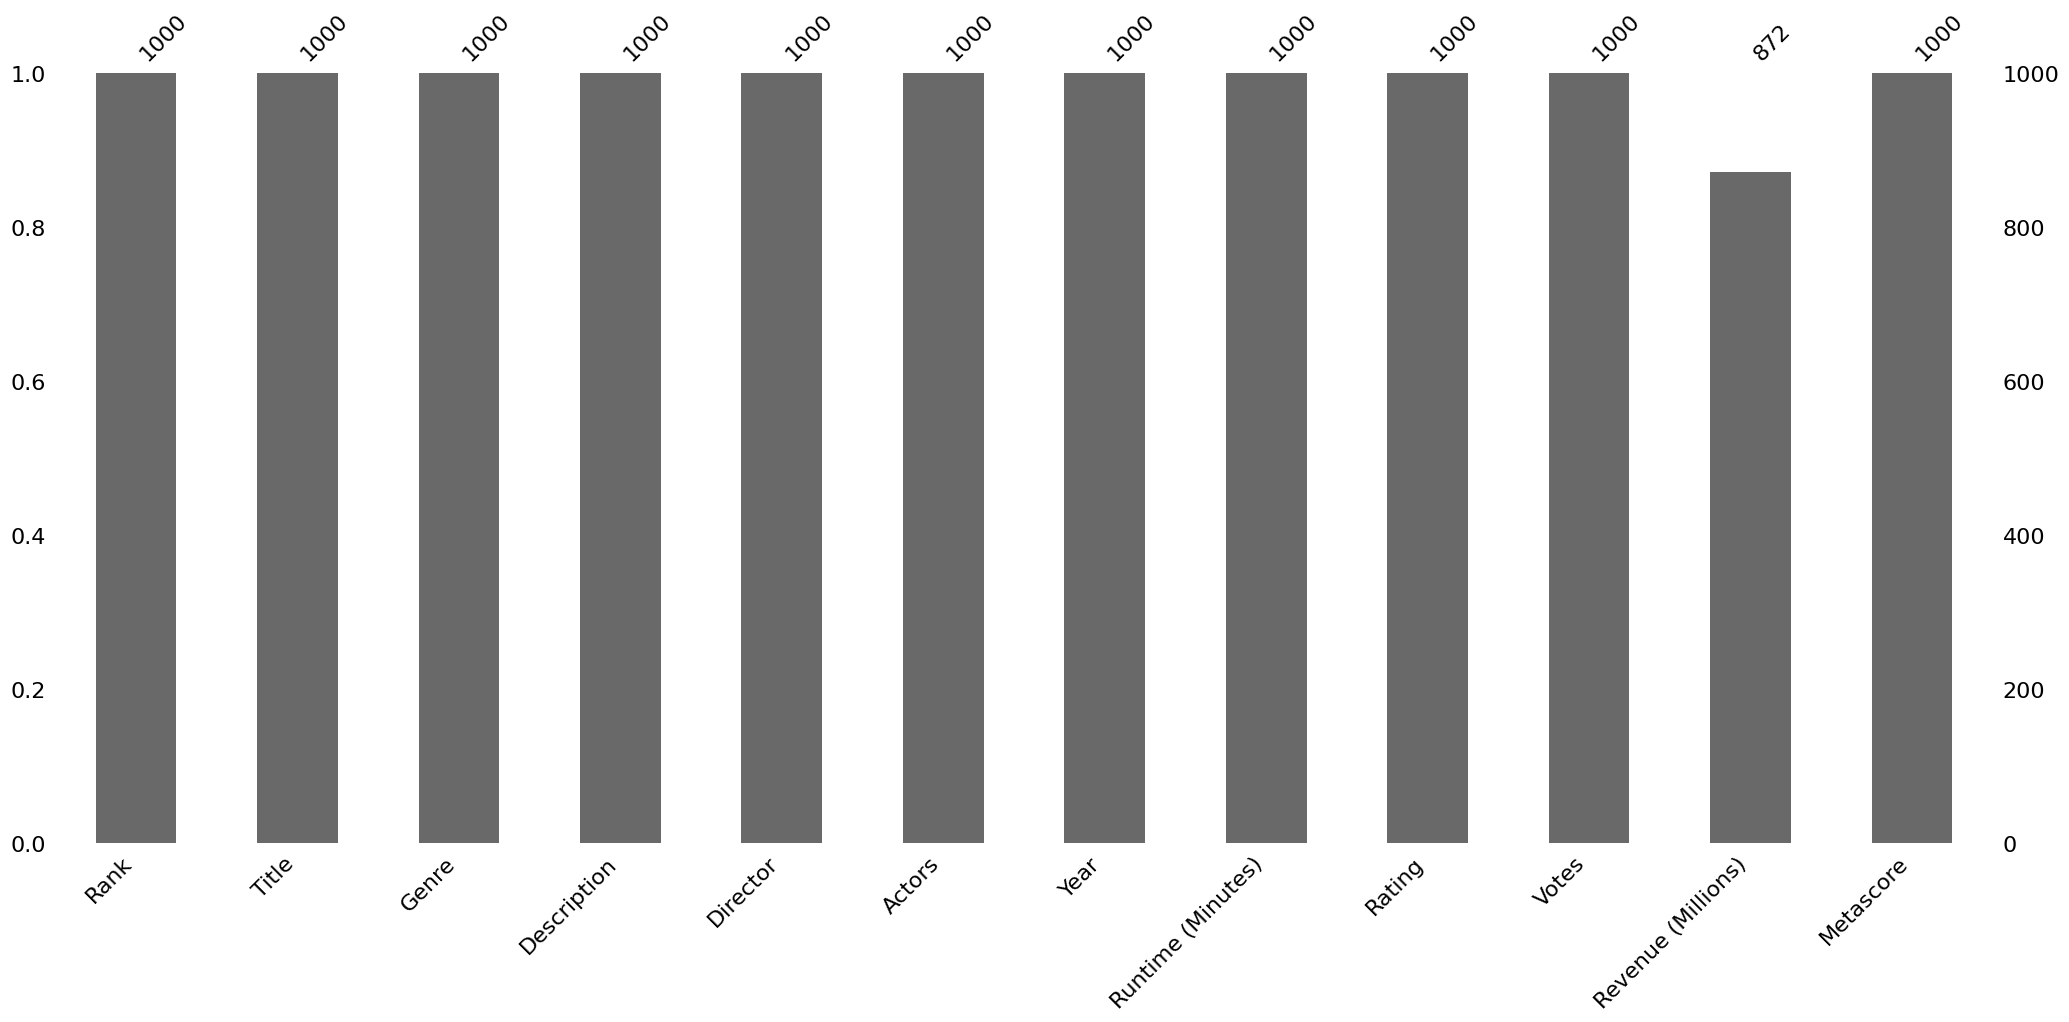

In [ ]:
data['Metascore'] = data['Metascore'].replace(np.nan, data['Metascore'].mean())
msno.bar(data)

<Axes: >

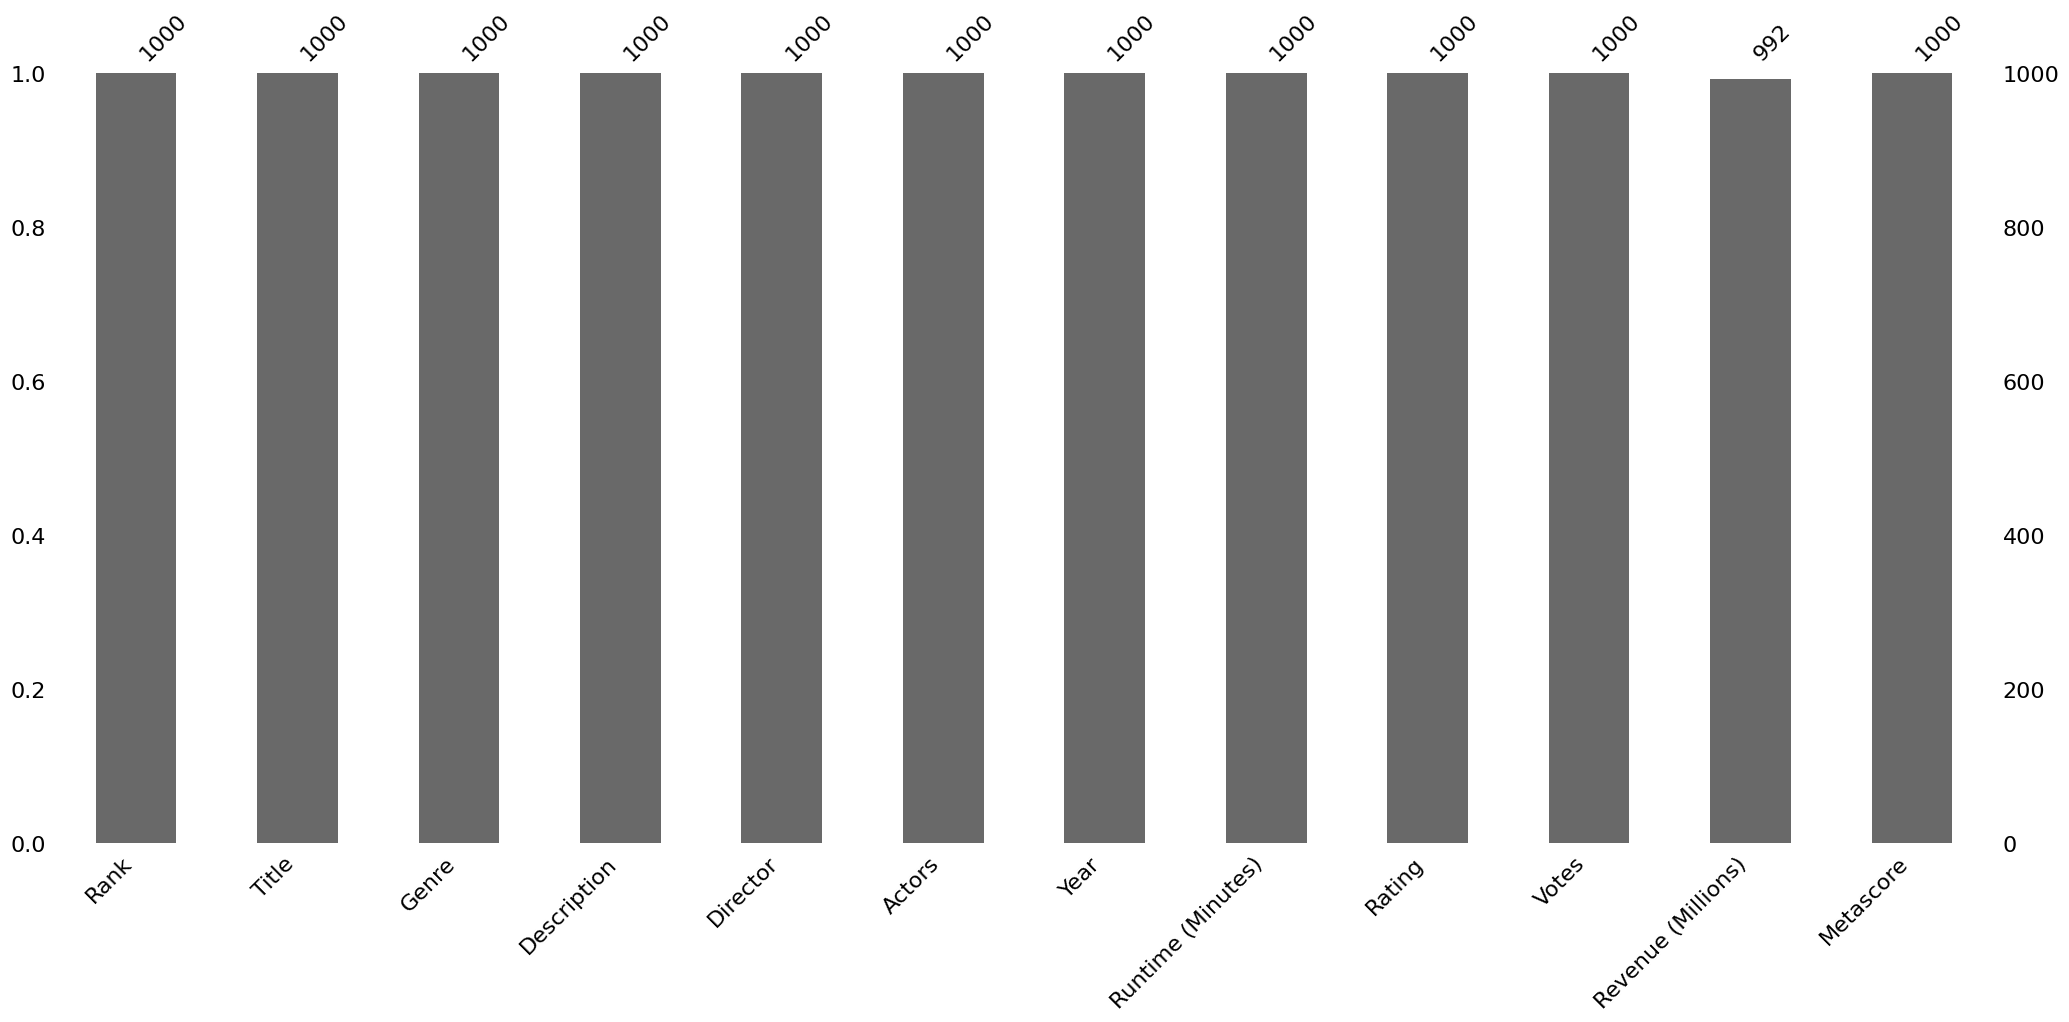

In [ ]:
rev = {}
for i in range(len(data)):
  r = data.at[i, 'Rating']
  if r not in rev and str(data.at[i, 'Revenue (Millions)']).lower() != 'nan':
    rev[r] = []
  if data.at[i, 'Revenue (Millions)'] and str(data.at[i, 'Revenue (Millions)']).lower() != 'nan':
    rev[r].append(data.at[i, 'Revenue (Millions)'])

for x in rev:
  rev[x] = sum(rev[x])/len(rev[x])

for i in range(len(data)):
  if str(data.at[i, 'Revenue (Millions)']).lower() == 'nan' and data.at[i, 'Rating'] in rev:
      data.at[i, 'Revenue (Millions)'] = rev[data.at[i, 'Rating']]

msno.bar(data)

In [ ]:
data = data.rename(columns={'Runtime (Minutes)': 'Runtime', 'Revenue (Millions)': 'Revenue'}).drop('Rank', axis=1).drop_duplicates()

In [ ]:
data.sample(10)

,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
798,A Walk Among the Tombstones,"Crime,Drama,Mystery",Private investigator Matthew Scudder is hired ...,Scott Frank,"Liam Neeson, Dan Stevens, David Harbour, Boyd ...",2014,114,6.5,93883,25.98,57.0
327,A Street Cat Named Bob,"Biography,Comedy,Drama",Based on the international best selling book. ...,Roger Spottiswoode,"Luke Treadaway, Bob the Cat, Ruta Gedmintas, J...",2016,103,7.4,12643,0.04,54.0
591,Adoration,"Drama,Romance",A pair of childhood friends and neighbors fall...,Anne Fontaine,"Naomi Watts, Robin Wright, Xavier Samuel, Jame...",2013,112,6.2,25208,0.32,37.0
511,Shooter,"Action,Crime,Drama",A marksman living in exile is coaxed back into...,Antoine Fuqua,"Mark Wahlberg, Michael Peña, Rhona Mitra, Dann...",2007,124,7.2,267820,46.98,53.0
424,London Has Fallen,"Action,Crime,Drama","In London for the Prime Minister's funeral, Mi...",Babak Najafi,"Gerard Butler, Aaron Eckhart, Morgan Freeman,A...",2016,99,5.9,100702,62.40,28.0
222,It Follows,"Horror,Mystery",A young woman is followed by an unknown supern...,David Robert Mitchell,"Maika Monroe, Keir Gilchrist, Olivia Luccardi,...",2014,100,6.9,136399,14.67,83.0
595,Let Me In,"Drama,Horror,Mystery",A bullied young boy befriends a young female v...,Matt Reeves,"Kodi Smit-McPhee, Chloë Grace Moretz, Richard ...",2010,116,7.2,97141,12.13,79.0
311,La vie d'Adèle,"Drama,Romance","Adèle's life is changed when she meets Emma, a...",Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",2013,180,7.8,103150,2.20,88.0
69,Deepwater Horizon,"Action,Drama,Thriller","A dramatization of the April 2010 disaster, wh...",Peter Berg,"Mark Wahlberg, Kurt Russell, Douglas M. Griffi...",2016,107,7.2,89849,61.28,68.0
743,True Grit,"Adventure,Drama,Western",A tough U.S. Marshal helps a stubborn teenager...,Ethan Coen,"Jeff Bridges, Matt Damon, Hailee Steinfeld,Jos...",2010,110,7.6,254904,171.03,80.0


Гипотеза: популярность фильма зависит от жанра фильма

In [ ]:
def choose_genre(s):
  s = str(s)
  if ',' in s:
    return(s[:s.index(',')])
  return s

n_data = data.copy()
n_data.Genre = n_data.Genre.transform(choose_genre)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Horror'),
  Text(3, 0, 'Animation'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Biography'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Crime'),
  Text(8, 0, 'Romance'),
  Text(9, 0, 'Mystery'),
  Text(10, 0, 'Thriller'),
  Text(11, 0, 'Sci-Fi'),
  Text(12, 0, 'Fantasy')])

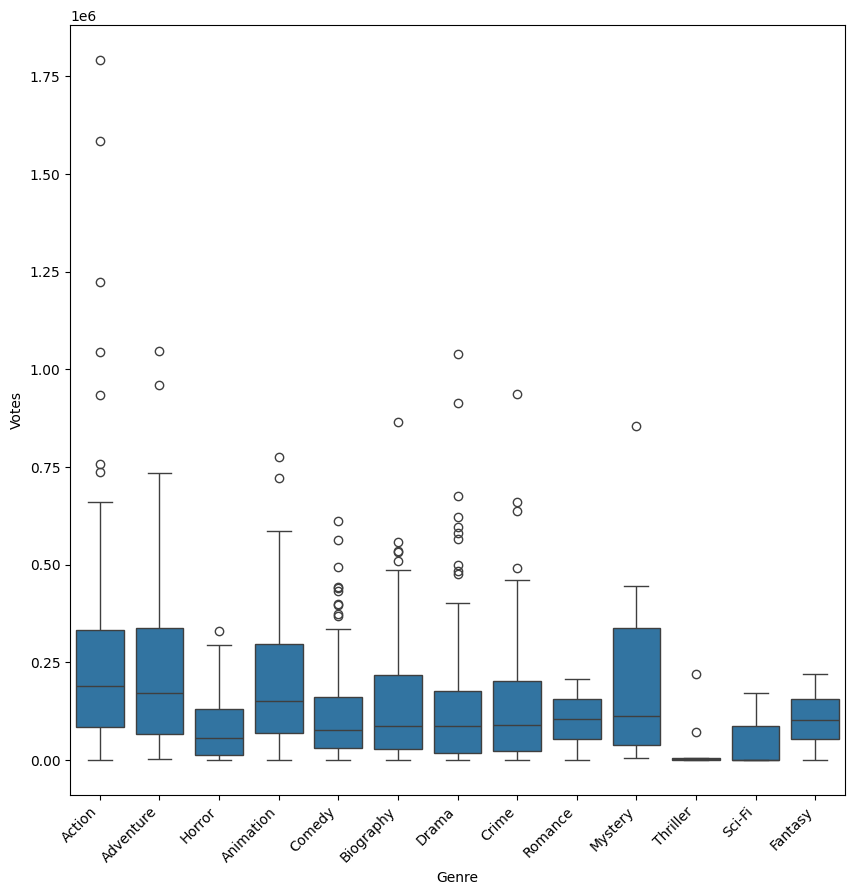

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(x='Genre', y='Votes', data=n_data, ax=ax)
plt.xticks(rotation=45, ha='right')

Гипотеза подтвердилась. Можно заметить, что в разных жанрах отслеживается разное среднее количество оценок. Также можно заметить, что выбросы соответствуют высоким рейтингам.

Самым популярным жанром за все время в рассматриваемой выборке - это приключения.

In [ ]:
n_data[n_data.Votes==n_data.Votes.max()]

,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
54,The Dark Knight,Action,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


Фильм, которому поставило оценку самое большое количество зрителей - Темный рыцарь

Гипотеза: чем выше рейтинг фильма, тем выше его доход

In [ ]:
fig = px.scatter(data, x = 'Rating', y = 'Revenue', trendline='lowess', trendline_options=dict(frac=0.2), trendline_color_override='red')
fig.show()

In [ ]:
n_data = data.copy()
n_data['mean_rev'] = n_data.groupby(by='Rating')['Revenue'].transform(np.mean)
n_data = n_data.drop_duplicates(subset='Rating')
fig = px.scatter(n_data, x='Rating', y='mean_rev', trendline='lowess', trendline_color_override='red', labels={'mean_rev': 'Average revenue by rating'})
fig.show()

По первому графику: зависимости дохода от рейтинга нельзя однозначно сделать вывод, что эти две характеристики коррелируют. Но, рассматривая график зависимости среднего дохода от рейтингов фильма, можно заметить, что аппроксимирующая кривая возрастает. Таким образом, гипотеза подтвердилась.

Гипотеза: с течением времени зрителям все меньше нравятся фильмы ужасов.

In [ ]:
horrors = data[data.Genre.map(lambda x: True if 'Horror' in x else False)]
fig = px.scatter(horrors, x='Year', y='Rating', trendline='lowess', trendline_color_override='red')
fig.show()

In [ ]:
horrors['mean_rating'] = horrors.groupby(by='Year')['Rating'].transform(np.mean)
horrors = horrors.drop_duplicates(subset='Year')
horrors = horrors.sort_values(by='Year')
fig = px.line(horrors, x='Year', y='mean_rating', markers=True, labels = {'mean_rating': 'Average rating for horrors by year'})
fig.show()

**Гипотеза не подтвердилась.** По приведенному графику среднего рейтинга хоррор-фильмов, вышедших за год, видно, что рейтинг фильмов несильно зависит от года. А также заметно, что в крайние рассматриваемые года рейтинг у хоррор-фильмов увеличился.

**Гипотеза:** Исходя из определенного выше фильма с наибольшим числом голосов от зрителей, можно сказать, что Кристофер Нолан делал лучшие фильмы по мнению зрителей.

In [ ]:
n_data = data.copy(deep=True)
n_data['rate_count'] = n_data.groupby(by='Director')['Rating'].transform(len)
n_data['mean_rate'] = n_data.groupby(by='Director')['Rating'].transform(np.mean)
n_data = n_data.drop_duplicates(subset='Director')
n_data = n_data.sort_values(by='mean_rate', ascending=False)
n_data = n_data.head(10)

fig = px.bar(n_data, x='Director', y='mean_rate', color='rate_count', labels = {'mean_rate': 'Average rating by director', 'rate_count': 'Number of films by director'})
fig.show()

Из получившегося графика можно заметить, что первое место среди режиссеров по оценке зрителей занимает Nitesh Tiwary, но мы также можем заметить, что в текущей выборке у данного режиссера всего один фильм. Таким образом, полученную оценку можно считать некорректной. Второе место занимает Кристофер Нолан, у которого в датасете имеется 5 фильмов, чего достаточно для того, чтобы сказать, что он - лучший режиссер по мнению зрителей. **Гипотеза подтвердилась.**

Гипотеза: драматические фильмы выпускают чаще остальных.

In [ ]:
D = dict()
for row in data.iterrows():
  genres = row[1].Genre.split(',')
  for g in genres:
    if g not in D:
      D[g] = 0
    D[g] += 1

D = pd.DataFrame(data=D, index=['count']).T
D = D.sort_values(by='count', ascending=False)
fig = px.bar(D, x=D.index, y='count', labels={'index': 'Genre', 'count': 'Number of films'})
fig.show()


**Гипотеза подтвердилась.** По данному графику можно заметить, что количество драматических фильмов намного превышает количество фильмов из других жанров.

Гипотеза: Анимационные картины имеют наименьшую продолжительность фильмов.

In [ ]:
movies_time_genre = data[['Genre', 'Runtime']]
movies_time_genre_update = movies_time_genre.assign(genre=movies_time_genre['Genre'].str.split(',')).explode('genre')
movies_time_genre_update = movies_time_genre_update[['genre', 'Runtime']]
mean_runtime = movies_time_genre_update.groupby('genre')['Runtime'].mean().to_frame().reset_index()

In [ ]:
source = ColumnDataSource(mean_runtime)
output_notebook()
genre_list = source.data['genre'].tolist()
p = figure(
    y_range=genre_list,
    width=800,
    height=600,
    title='Средняя продолжительность фильмов по жанрам',
    x_axis_label='Продолжительность фильмов (в минутах)',
)

p.hbar(
    y='genre',
    right='Runtime',
    left=0,
    height=0.4,
    fill_alpha=0.9,
    source=source
)

show(p)

**Гипотеза подтвердилась.** По приведенному графику наглядно видно, что анимационные фильмы в действительности имеют самую маленькую продолжительность. Это логично, учитывая что основной целевой аудиторией мультфильмов являются дети, а им тяжелее удерживать внимание долго. Также можно заметить, что следующий жанр по продолжительности фильмов - это хоррор-фильмы, что, наверное, обуславливается тем, что в таких фильмах сюжет уходит на второй план и события развиваются намного быстрее.

Гипотеза: Наивысшый рейтинг у фильмов, длительность которых примерно равна 120 минутам.

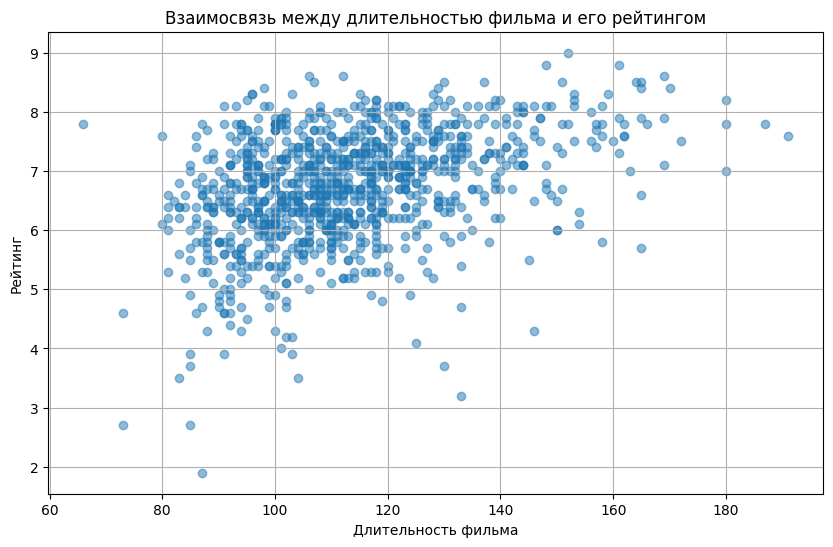

In [ ]:
correlation = data['Runtime'].corr(data['Rating'])

plt.figure(figsize=(10, 6))
plt.scatter(data['Runtime'], data['Rating'], alpha=0.5)
plt.title('Взаимосвязь между длительностью фильма и его рейтингом')
plt.xlabel('Длительность фильма')
plt.ylabel('Рейтинг')
plt.grid(True)
plt.show()

**Гипотеза подтвердилась**. По приведенному графику наглядно видно, что фильмы длительностью около 110 минут выше рейтингом чем другие. Фильмы такого хронометража легко смотреть, человек не сильно устает физически по сравнению с фильмами которые дляться дольше

Гипотеза: Раньше выпускалось больше комедий чем драм

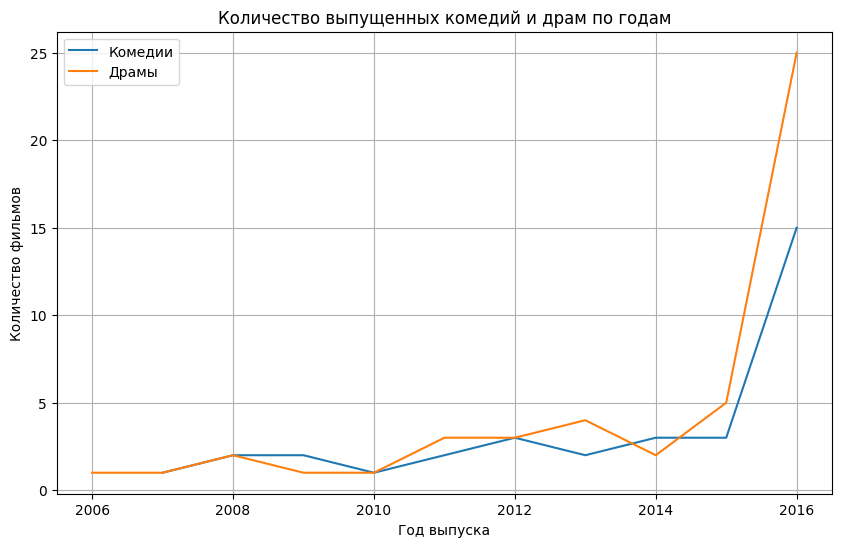

In [ ]:
df = data.copy()
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
comedies = df[df['Genre'] == 'Comedy']
dramas = df[df['Genre'] == 'Drama']
comedies_by_year = comedies.groupby('Year').size()
dramas_by_year = dramas.groupby('Year').size()
plt.figure(figsize=(10, 6))
comedies_by_year.plot(label='Комедии')
dramas_by_year.plot(label='Драмы')
plt.title('Количество выпущенных комедий и драм по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество фильмов')
plt.legend()
plt.grid(True)
plt.show()


**Гипотеза не подтвердилась**. По приведенному графику анализа комедий и драм, можно заметить что лишь начиная с 2015 года драм стало больше, а до этого количество драм и комедий было одинаково

Гипотеза: У хоррор фильмов средние кассовые сборы меньше чем у остальных

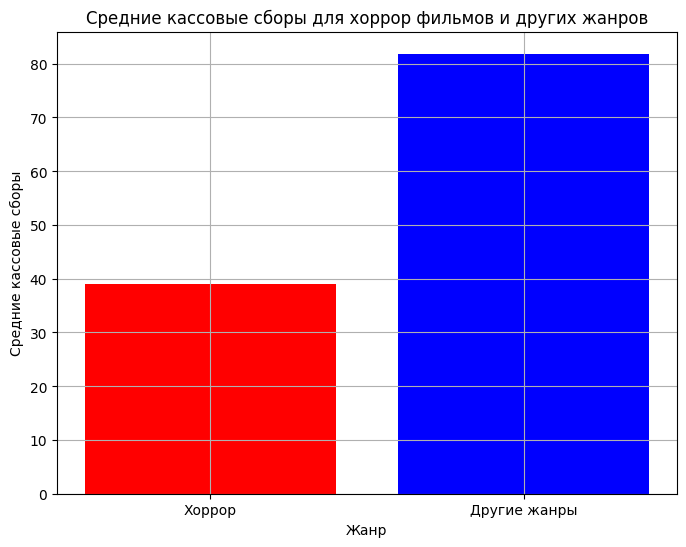

In [ ]:
new_data = data.copy()
genres = new_data['Genre'].explode(',')
df_expanded = df.assign(Genre=genres)
horror_movies = df_expanded[df_expanded['Genre'] == 'Horror']
other_movies = df_expanded[df_expanded['Genre'] != 'Horror']
mean_revenue_horror = horror_movies['Revenue'].mean()
mean_revenue_other = other_movies['Revenue'].mean()
plt.figure(figsize=(8, 6))
plt.bar(['Хоррор', 'Другие жанры'], [mean_revenue_horror, mean_revenue_other], color=['red', 'blue'])
plt.title('Средние кассовые сборы для хоррор фильмов и других жанров')
plt.xlabel('Жанр')
plt.ylabel('Средние кассовые сборы')
plt.grid(True)
plt.show()

**Гипотеза подтвердилась**. Мы можем заметить на графике, что у хорроров средние кассовые сборы намного меньше, чем фильмов других жанров

Гипотеза: у новых фильов доход больше

In [ ]:
new_movies = data[data['Year'] > 2011]
average_revenue_new_movies = new_movies['Revenue'].mean()
old_movies = data[data['Year'] <= 2011]
average_revenue_old_movies = old_movies['Revenue'].mean()
print("Средний доход для новых фильмов:", average_revenue_new_movies)
print("Средний доход для старых фильмов:", average_revenue_old_movies)


Средний доход для новых фильмов: 74.28699125382921
Средний доход для старых фильмов: 96.29923594398635


**Гипотеза подтвердилась**. Можем заметить что средний доход фильмов вышедшых раньше 2011 года больше


Гипотеза: Чем новее фильмы тем они дольше идут

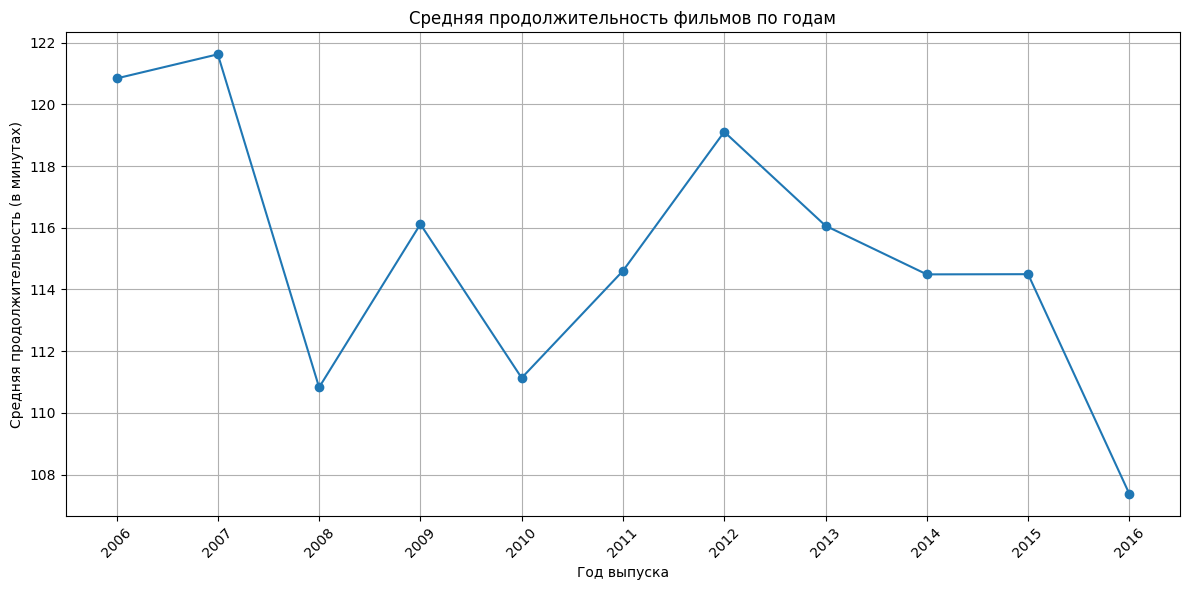

In [ ]:
average_runtimes_by_year = data.groupby('Year')['Runtime'].mean()

plt.figure(figsize=(12, 6))
plt.plot(average_runtimes_by_year.index, average_runtimes_by_year.values, marker='o', linestyle='-')
plt.title('Средняя продолжительность фильмов по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя продолжительность (в минутах)')
plt.grid(True)
plt.xticks(average_runtimes_by_year.index, rotation=45)
plt.tight_layout()
plt.show()

**Гипотеза не подтвердилась**. Наоборот чем новее фильмы тем их длительность короче.

**Гипотеза:** Фильмы с Брэдом Питом имеют рейтинг выше среднего

In [ ]:
brad_pitt_movies = data[data['Actors'].str.contains('Brad Pitt', na=False)]

source = ColumnDataSource(brad_pitt_movies)
output_notebook()

p = figure(title="Distribution of Ratings for Brad Pitt Movies", x_axis_label='Rating', y_axis_label='Frequency')
hist, edges = np.histogram(brad_pitt_movies['Rating'], bins=20)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="navy", line_color="white", alpha=0.5)

mean_rating_brad_pitt = brad_pitt_movies['Rating'].mean()

p.line([mean_rating_brad_pitt, mean_rating_brad_pitt], [0, max(hist)], line_color="red", line_width=2, legend_label=f"Mean Rating: {mean_rating_brad_pitt:.2f}")

p2 = figure(title="Distribution of Ratings for All Movies", x_axis_label='Rating', y_axis_label='Frequency')
hist_all, edges_all = np.histogram(data['Rating'], bins=20)
p2.quad(top=hist_all, bottom=0, left=edges_all[:-1], right=edges_all[1:], fill_color="navy", line_color="white", alpha=0.5)

mean_rating_all = data['Rating'].mean()

p2.line([mean_rating_all, mean_rating_all], [0, max(hist_all)], line_color="red", line_width=2, legend_label=f"Mean Rating: {mean_rating_all:.2f}")

output_notebook()
show(p)
show(p2)

**Гипотеза подтвердилась.** По данному графику можно заметить, что все фильмы имеют рейтинг выше 6.8, а так же средний рейтинг выше среднего рейтинга по всем фильмам.

**Гипотеза:** Первые фильмы режиссеров имеют рейтинг ниже, чем их последующие работы.

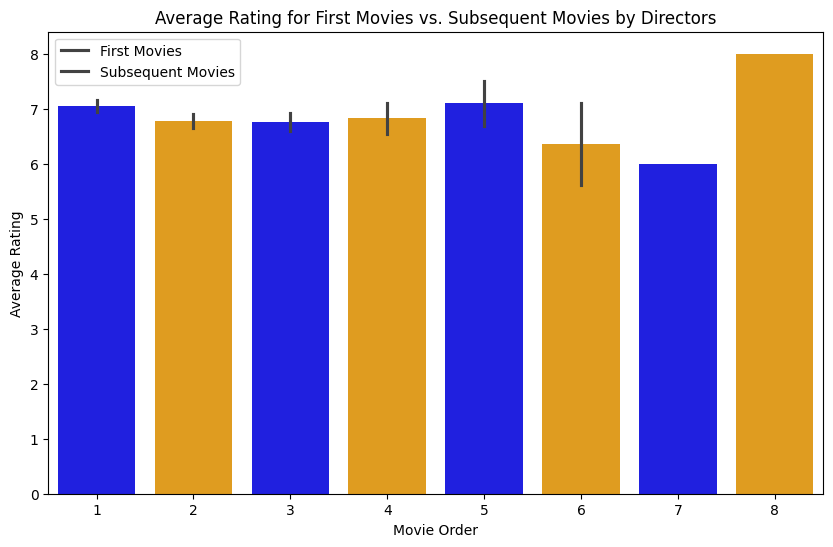

In [ ]:
directors_with_multiple_movies = data['Director'].value_counts()[data['Director'].value_counts() > 1].index

directors_df = data[data['Director'].isin(directors_with_multiple_movies)]
directors_df_sorted = directors_df.sort_values(by=['Director', 'Year'])
directors_df_sorted['Movie_Order'] = directors_df_sorted.groupby('Director').cumcount() + 1
mean_ratings = directors_df_sorted.groupby(['Director', 'Movie_Order'])['Rating'].mean().reset_index()

first_movies_mean = mean_ratings[mean_ratings['Movie_Order'] == 1]
subsequent_movies_mean = mean_ratings[mean_ratings['Movie_Order'] > 1]

plt.figure(figsize=(10, 6))
sns.barplot(data=mean_ratings, x='Movie_Order', y='Rating', hue='Movie_Order', dodge=False, palette=['blue', 'orange'])
plt.title('Average Rating for First Movies vs. Subsequent Movies by Directors')
plt.xlabel('Movie Order')
plt.ylabel('Average Rating')
plt.legend(['First Movies', 'Subsequent Movies'])
plt.show()

**Гипотеза не подтвердилась.** Можно заметить, что тенденция повышения рейтинга для последующих фильмов отсутсвует.

**Гипотеза:** Чем больше рейтинг тем больше оценка кинокритиков.

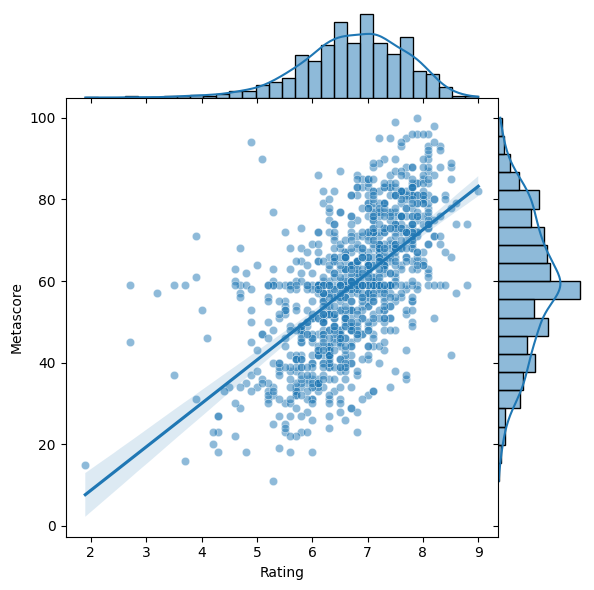

In [ ]:
g = sns.JointGrid(data=data, x='Rating', y='Metascore', space=0, height=6, ratio=5)
g = g.plot_joint(sns.scatterplot, alpha=0.5)
g = g.plot_marginals(sns.histplot, kde=True)

sns.regplot(x='Rating', y='Metascore', data=data, scatter=False, ax=g.ax_joint)

plt.show()

**Гипотеза подтвердилась.** На графике заметно, что рейтинг и оценка критиков связаны, и прямо пропорциональны.

**Гипотеза:** Драматические фильмы в среднем получают более высокую оценку критиков, чем фильмы других жанров.

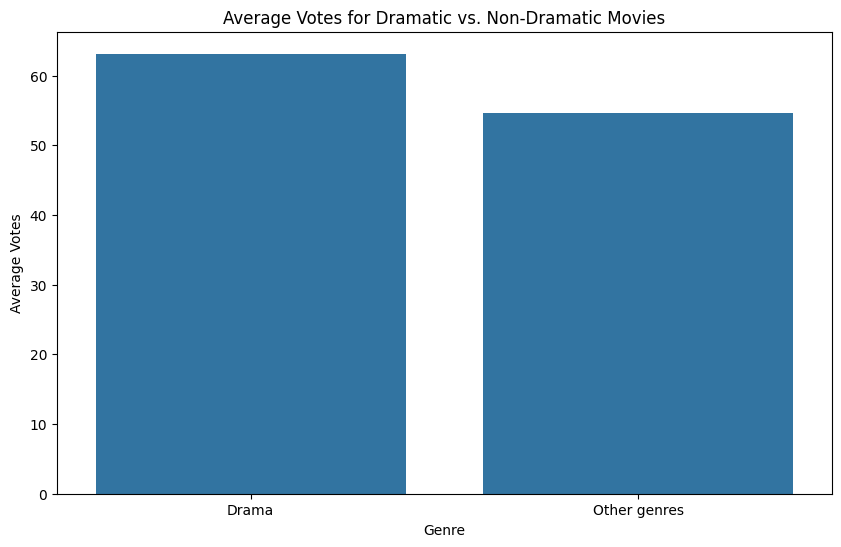

In [ ]:
data['Genre_Category'] = data['Genre'].apply(lambda x: 'Drama' if 'Drama' in x else 'Other genres')

genre_votes_mean = data.groupby('Genre_Category')['Metascore'].mean().reset_index()

genre_votes_ci = data.groupby('Genre_Category')['Metascore'].agg(['mean', 'sem']).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_votes_mean, x='Genre_Category', y='Metascore', ci='sd', capsize=0.1)
plt.title('Average Votes for Dramatic vs. Non-Dramatic Movies')
plt.xlabel('Genre')
plt.ylabel('Average Votes')
plt.show()

**Гипотеза подвердилась.** Действительно, драма кинокритиками оценивается выше, чем остальные жанры.

**Гипотеза:** Кассовые сборы с течением времени растут.

In [ ]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

yearly_revenue_mean = data.groupby(data['Year'].dt.year)['Revenue'].mean().reset_index()

yearly_revenue_ci = data.groupby(data['Year'].dt.year)['Revenue'].agg(['mean', 'sem']).reset_index()

fig = px.line(yearly_revenue_mean, x='Year', y='Revenue', title='Average Revenue Over Time')
fig.update_traces(error_y=dict(type='data', array=yearly_revenue_ci['sem']))
fig.show()

**Гипотеза не подтвердилась.** Можем заметить, что тренд был положительным до 2009 года, но потом постепенно стал негативным.

Отсортированные гипотезы по значимости результата:

1) популярность фильма зависит от жанра фильма

2) чем выше рейтинг фильма, тем выше его доход

3) чем новее фильмы, тем дольше они идут

4) у новых фильмов доход больше

5) фильмы с Брэдом Питом имеют рейтинг выше среднего

6) Кристофер Нолан делал лучшие фильмы по мнению зрителей

7) наивысший рейтинг у фильмов, длительность которых примерно равна 120 минутам

8) чем больше рейтинг, тем больше оценка кинокритиков

9) с течением времени зрителям все меньше нравятся фильмы ужасов

10) драматические фильмы выпускают чаще остальных

11) кассовые сборы с течением времени растут

12) первые фильмы режиссеров имеют рейтинг ниже, чем их последующие работы

13) анимационные картины имеют наименьшую продолжительность фильмов

14) У хоррор фильмов средние кассовые сборы меньше чем у остальных

15) драматические фильмы в среднем получают более высокую оценку критиков, чем фильмы других жанров

16) раньше выпускалось больше комедий, чем драм




